# Aula 3 - Machine Learning

# Exercício de fixação V - Métricas para Avaliação de Modelos

### Prof. Dr. José Ahirton Lopes

### Algoritmo para classificação de dados de clientes de uma telecom de acordo com sua possibiliade de evasão ou nao do serviço.

Base diabetes - 

Ref. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


Nossos imports serão o pandas, o datasets, nosso modelo linear e train_test_split do sckitlearn bem como o matplotlib:

In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Vamos analisar rapidamente as bibliotecas que importamos:

Pandas - para carregar o arquivo de dados como um dataframe do Pandas e analisar os dados;

No Sklearn, importamos o módulo de conjuntos de dados (databases) para carregar uma base de amostra e o linear_model para executar uma regressão linear;

No Sklearn, com a sub-biblioteca model_selection, importamos então train_test_split para que possamos dividir corretamente nossos dados em conjuntos de treinamento e teste;

Do Matplotlib, importamos o pyplot para plotar gráficos dos dados.

In [2]:
# Carregando o dataset 'diabetes'

# Declarando os nomes de nossas colunas
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()

# Carregando o dataset 'diabetes'do sklearn
diabetes = datasets.load_diabetes()

# Carregando o dataset como um pandas dataframe
df = pd.DataFrame(diabetes.data, columns=columns)

#Definindo nossa variável 'alvo' (dependente) como y
y = diabetes.target 

In [3]:
# Criando nossos sets de treinamento e teste (Lembre-se, comumente será em uma proporçao de 70/30 ou 80/20)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


Agora, ajustaremos o modelo aos dados de treinamento (model fitting):

In [4]:
# Model fitting
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Como você pode ver, estamos ajustando o modelo nos dados de treinamento e tentando prever os dados de teste. 

Vamos ver algumas das previsões:


In [5]:
predictions[0:5]

array([138.96248467, 209.44770112, 187.22425755, 117.34635388,
       222.74030136])

Obs: como usamos [0: 5] após as previsões, mostra-se então apenas os cinco primeiros valores previstos. 

Remover o [0: 5] faria com que fossem imprimidos todos os valores previstos que nosso modelo criou.

Agora vamos plotar nosso modelo de regressão linear:

Text(0, 0.5, 'Predicoes')

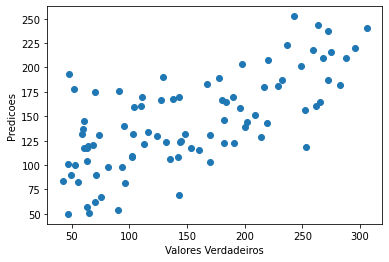

In [6]:
## Modelo de regressao linear
plt.scatter(y_test, predictions)
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Predicoes')

Score de acurácia para nosso modelo:

In [7]:
print ('Score:', model.score(X_test, y_test))

Score: 0.470607755129547


## Exercício de fixação VI / Desafio III - Validação Cruzada, K-Pastas e Leave One Out


**[Desafio III]** Como desafio, atentem para a utilização do mesmo exemplo mas dessa vez com a utilização de validação via validação cruzada via K-Pastas (K-Folds Cross Validation)  e, a posteriori, façam o mesmo exemplo dessa vez com validação via Método Leave One Out (como visto em aula).

Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

##**KFold**

In [8]:
# Imports necessários

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

In [9]:
# No parâmetro "cv" do comando "cross_val_score" quando prenchido com um inteiro já utiliza o KFold ou o StratifiedKFold dependendo do número de pastas
#Mesmo assim vamos chamar a classe KFold separadamento para fazer as próprias configuração com 8 pastas e usar o seu retorno no parâmetro "cv"
k_fold = KFold(n_splits=8, shuffle=True, random_state=11)
print(k_fold)

KFold(n_splits=8, random_state=11, shuffle=True)


In [10]:
scores = cross_val_score(lm, df, y, cv=k_fold)
print ('Scores com Validação Cruzada KFold:', scores)

Scores com Validação Cruzada KFold: [0.56769498 0.52398085 0.4275024  0.41765192 0.50751211 0.54300948
 0.45662064 0.40407985]


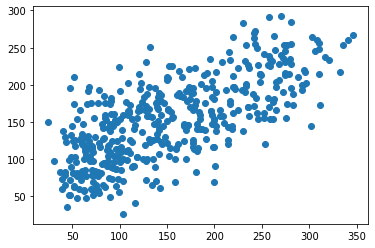

In [11]:
# Fazendo predições com nossa validação cruzada

predictions = cross_val_predict(model, df, y, cv=k_fold)
plt.scatter(y, predictions)

Podemos ver que nosso plot é bem diferente do original, de nosso exemplo anterior. São oito vezes mais pontos que o gráfico original pois usamos cv = 8.

Por fim, vamos verificar a pontuação R² do modelo. 

R² é um "número que indica a proporção da variação na variável dependente que é previsível a partir da (s) variável (s) independente (s)". 

Basicamente, quão preciso é o nosso modelo:


In [12]:
accuracy = metrics.r2_score(y, predictions)
print ('Acurácia via Predição Cruzada:', accuracy)
print('Ou acurácia média de %0.2f (Desvio de +/- %0.2f)' % (scores.mean(), scores.std() * 2))


Acurácia via Predição Cruzada: 0.4924100634605857
Ou acurácia média de 0.48 (Desvio de +/- 0.12)


Para mais informações sobre outros scores/métricas favor consultar:

Ref. https://towardsdatascience.com/machine-learning-cheat-sheet-model-evaluation-and-validation-b67565df6075

##**Leave One Out**

In [13]:
# Imports
from sklearn.model_selection import LeaveOneOut
from numpy import absolute

In [14]:
#Vamos chamar a classe LeaveOneOut para usar depois o seu retorno no parâmetro "cv"
loocv= LeaveOneOut()
print(loocv)

LeaveOneOut()


In [15]:
# Foi usado a métrica de desempenho do erro absoluto médio ou MAE
scores = cross_val_score(lm, df, y, cv=loocv, scoring='neg_mean_absolute_error', n_jobs=-1)
print ('Scores com Validação Cruzada:', scores)

Scores com Validação Cruzada: [ -56.1069823    -7.08596148  -36.74938514  -39.84815035   -6.62587449
   -9.54540868  -65.17559242  -57.75418143  -49.89707587  -98.80308307
   -4.08091586  -27.72069618  -64.41479089  -20.54463747  -15.23365994
   -6.49968715  -46.79802837  -39.45529397  -51.47917886  -44.39203431
  -53.24046797  -37.68099535  -46.0927371    -8.38632815  -18.79404097
  -55.27264795  -41.00015368  -96.01020338   -1.9980424  -102.44469044
  -30.14410011  -10.62569494  -85.3249833   -26.97583111  -13.5908564
  -15.12111361  -58.19850776 -119.91448141  -11.41795101  -47.93897588
  -54.72334903  -19.68377807  -85.86048725  -14.75200661  -38.82688974
  -73.20993723  -48.1898431   -33.37301725   -1.89876004  -48.77273567
   -2.97345255  -56.22122821  -76.04107823  -54.96297576  -43.56043979
  -56.6265947  -158.23545077  -43.90665055  -71.76801526  -36.10820349
  -54.04503898  -37.84002128   -9.38410964  -29.93203645  -43.73391005
  -27.7018913    -1.03784121  -27.59277232  -45.

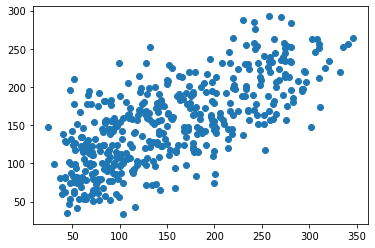

In [16]:
# Fazendo predições com nossa validação cruzada

predictions = cross_val_predict(lm, df, y, cv=loocv, n_jobs=-1)
plt.scatter(y, predictions)

Nesse caso se assemelha com o KFold anterior.

Vamos verificar agora a acuracidade e outras informações

In [17]:
accuracy = metrics.r2_score(y, predictions)
print ('Acurácia via Predição Cruzada:', accuracy)

#Forçando valores positivos
scores = absolute(scores)
print('Ou acurácia média de %0.2f (Desvio de +/- %0.2f)' % (scores.mean(), scores.std()))

Acurácia via Predição Cruzada: 0.4937935079824347
Ou acurácia média de 44.36 (Desvio de +/- 32.16)


In [18]:
#Quantidade de pastas
print("Quantidade de pastas:", len(scores))


Quantidade de pastas: 442
